<a href="https://colab.research.google.com/github/ZulfaliaPutri/Capstone_WebsiteSentimenTwitter/blob/main/CNN_LSTM_Fasttext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
from google.colab import drive
import os
import pandas as pd

import re
import string
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Data Loading

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.listdir('/content/gdrive/My Drive/Capstone/dataset')

['citation.bib',
 'README.md',
 'data.csv',
 'abusive.csv',
 'new_kamusalay.csv',
 'stopwordbahasa.csv']

In [ ]:
import chardet
file = '/content/gdrive/My Drive/Capstone/dataset/data.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.7290065581419461, 'encoding': 'ISO-8859-1', 'language': ''}

In [ ]:
df = pd.read_csv(file,encoding='ISO-8859-1')
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
alay_dict = pd.read_csv("/content/gdrive/My Drive/Capstone/dataset/new_kamusalay.csv", encoding = 'latin-1', header=None)
alay_dict = alay_dict.rename(columns=  {0: 'original', 1: 'replacement'})
alay_dict

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [ ]:
stopwords = pd.read_csv("/content/gdrive/My Drive/Capstone/dataset/stopwordbahasa.csv", header=None)
stopwords = stopwords.rename(columns={0: 'stopword'})
stopwords

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak
...,...
753,wong
754,yaitu
755,yakin
756,yakni


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [ ]:
df.drop(df.iloc[:, 3:12], inplace = True, axis = 1)
df.head()

,Tweet,HS,Abusive,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0


In [ ]:
df['length'] = df['Tweet'].apply(len)
df.head()

,Tweet,HS,Abusive,HS_Strong,length
0,- disaat semua cowok berusaha melacak perhatia...,1,1,0,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,75
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,89


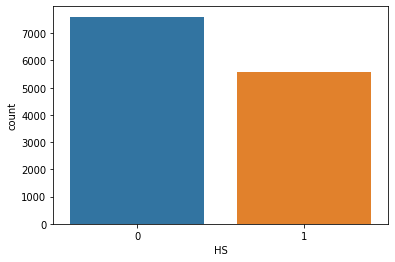

In [ ]:
import seaborn as sns
sns.countplot(x='HS', data=df)

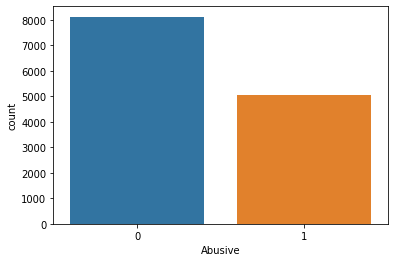

In [ ]:
sns.countplot(x='Abusive', data=df)

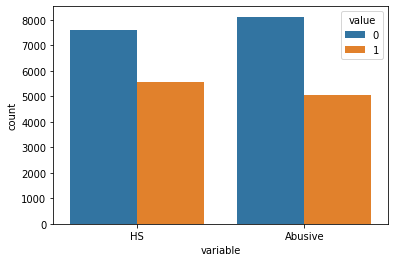

In [ ]:
sns.countplot(x="variable", hue="value", data=pd.melt(df.iloc[:,1:3]))

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#lowercase
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('((@[^\s]+)|(#[^\s]+))',' ',text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in stopwords.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

def preprocess(text):
    text = lowercase(text) # 1
    text = remove_unnecessary_char(text) # 2
    text = remove_nonaplhanumeric(text) # 3
    text = normalize_alay(text) # 4
    text = remove_stopword(text) # 5
    text = stemming(text) # 6
    return text

In [ ]:
X = df['Tweet'].apply(preprocess)
X

0        cowok usaha lacak perhati gue lantas remeh per...
1        guna guna telat tau edan sarap gue gaul cigax ...
2        41 kadang pikir percaya tuhan jatuh kali kali ...
3                              guna guna ku tau mata sipit
4            guna guna kaum cebong kafir dongok dungu haha
                               ...                        
13164              guna bicara ndasmu congor sekata anjing
13165                               guna kasur enak kunyuk
13166        guna hati hati bisu bosan duh xf0 x9f x98 xaa
13167    guna guna guna guna bom real mudah deteksi bom...
13168                         guna situ foto ya kutil onta
Name: Tweet, Length: 13169, dtype: object

In [ ]:
df.to_csv('data_clean.csv')

In [ ]:
print(df.shape)

(13169, 5)


In [ ]:
df.isnull().sum()

Tweet        0
HS           0
Abusive      0
HS_Strong    0
length       0
dtype: int64

In [ ]:
#filter = df["tweet"] != ""
#df = df[filter]
#df = df.dropna()

In [ ]:
tweet_labels = df[["HS", "Abusive"]]
tweet_labels.head()

,HS,Abusive
0,1,1
1,0,1
2,0,0
3,0,0
4,1,1


In [ ]:
y = tweet_labels.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Embedding Layer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = max(df['length'])

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import asarray
#Word2Vec Embedding
#file source : https://github.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset
embeddings_dictionary = dict()
#word2vec_file = open('/content/drive/My Drive/Tubes NLP/word embedding/Word2Vec_400dim.txt', encoding="utf8")
word2vec_file = open('/content/gdrive/My Drive/Capstone/cc.id.300.vec', encoding='utf-8')

for line in word2vec_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
word2vec_file.close()

In [ ]:
from numpy import zeros
import numpy as np
# Membuat embedding matrix
null_word=[]
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector
    else:
      #word.append(null_word)
      null_word += [word]
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

number of null word embeddings: 1424


In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from tensorflow.keras.layers import Layer, InputSpec

import logging
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback

from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

#Buat function model
embed_size = 300
max_features = vocab_size

def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (maxlen,))
    x = Embedding(max_features, embed_size, weights = [embedding_matrix], trainable = False)(inp)
    x1 = SpatialDropout1D(dr)(x)

    x = Bidirectional(GRU(units, return_sequences = True))(x1)
    #x = Conv1D(int(units/2), kernel_size = 2, kernel_regularizer=regularizers.l2(0.001), activation='relu')(x)
    x = Conv1D(int(units/2), kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
    
    y = Bidirectional(LSTM(units, return_sequences = True))(x1)
    #y = Conv1D(int(units/2), kernel_size = 2, kernel_regularizer=regularizers.l2(0.001), activation='relu')(y)
    y = Conv1D(int(units/2), kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(y)
    
    avg_pool1 = GlobalAveragePooling1D()(x)
    max_pool1 = GlobalMaxPooling1D()(x)
    
    avg_pool2 = GlobalAveragePooling1D()(y)
    max_pool2 = GlobalMaxPooling1D()(y)
    
    x = concatenate([avg_pool1, max_pool1, avg_pool2, max_pool2])
    x = Dense(16, activation="relu")(x)
    #x = Dropout(0.5)(x)
    x = Dense(32, activation="relu")(x)
    x = Dropout(0.2)(x)
    #x = Dense(64, activation="relu")(x)
    #x = Dropout(0.1)(x)
    x = Dense(2, activation = "softmax")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = lr, decay = lr_d), metrics = ["accuracy"])

    return model

In [ ]:
model = build_model(lr = 1e-3, lr_d = 0, units = 112, dr = 0.2)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 561)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 561, 300)     3504600     ['input_2[0][0]']                
                                                                                                  
 spatial_dropout1d_1 (SpatialDr  (None, 561, 300)    0           ['embedding_1[0][0]']            
 opout1D)                                                                                         
                                                                                                  
 bidirectional_2 (Bidirectional  (None, 561, 224)    278208      ['spatial_dropout1d_1[0][0]

In [ ]:
import tensorflow as tf

#Predict model
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=2, mode='auto', restore_best_weights=True)
#history = model.fit(X_train, y_train, batch_size = 128, epochs = 50, validation_data = (X_test, y_test), verbose = 1, callbacks=[callbacks])
history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, validation_data = (X_test, y_test), verbose = 1)
#pred = model.predict(test, batch_size = 1024, verbose = 1)

Epoch 1/10
83/83 [==============================] - 718s 9s/step - loss: 0.6053 - accuracy: 0.4492 - val_loss: 0.4955 - val_accuracy: 0.6238
Epoch 2/10
83/83 [==============================] - 723s 9s/step - loss: 0.4734 - accuracy: 0.6710 - val_loss: 0.4135 - val_accuracy: 0.7354
Epoch 3/10
83/83 [==============================] - 731s 9s/step - loss: 0.4170 - accuracy: 0.7033 - val_loss: 0.3710 - val_accuracy: 0.7035
Epoch 4/10
83/83 [==============================] - 729s 9s/step - loss: 0.3793 - accuracy: 0.6819 - val_loss: 0.3454 - val_accuracy: 0.6777
Epoch 5/10
83/83 [==============================] - 732s 9s/step - loss: 0.3564 - accuracy: 0.6657 - val_loss: 0.3479 - val_accuracy: 0.6822
Epoch 6/10
83/83 [==============================] - 700s 8s/step - loss: 0.3341 - accuracy: 0.6663 - val_loss: 0.3286 - val_accuracy: 0.7267
Epoch 7/10
83/83 [==============================] - 700s 8s/step - loss: 0.3135 - accuracy: 0.6743 - val_loss: 0.3284 - val_accuracy: 0.7107
Epoch 8/10
83

In [ ]:
# Hasil score model 
score = model.evaluate(X_test, y_test, verbose=1)

83/83 [==============================] - 67s 811ms/step - loss: 0.3231 - accuracy: 0.7179


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.32305991649627686
Test Accuracy: 0.7179195284843445


In [ ]:
from sklearn.metrics import classification_report
num_classes = 2
predicted_classes = model.predict(X_test)
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes.round(), target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.38      0.54      0.45      1118
     Class 1       0.78      0.83      0.80       988

   micro avg       0.54      0.68      0.60      2106
   macro avg       0.58      0.69      0.63      2106
weighted avg       0.57      0.68      0.61      2106
 samples avg       0.54      0.42      0.46      2106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


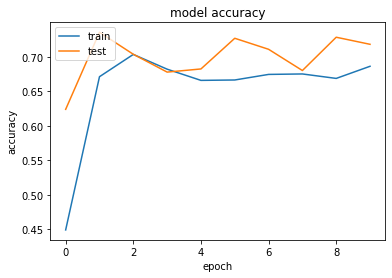

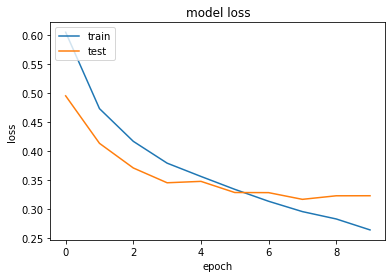

In [ ]:
import matplotlib.pyplot as plt

# Plotting model accuracy dan loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()